### Anomaly Detection Mini Project
#### Corey Solitaire
`11.09.2020`

<div class="alert alert-block alert-info"><b></b></div>

#### Imports:

In [1]:

import wrangle
import explore
import numpy as np
import pandas as pd
import math
from sklearn import metrics

from scipy.stats import entropy

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates #to format dates on our plots
import seaborn as sns

# This is to make sure matplotlib doesn't throw the following error:
# The next line fixes "TypeError: float() argument must be a string or a number, not 'Timestamp' matplotlib"
pd.plotting.register_matplotlib_converters()

<div class="alert alert-block alert-info"><b></b></div>

### Import wrangle df:

In [2]:
# Returns complete df
df = wrangle.read_csv()
df = wrangle.wrangle_df(df)
df.head()

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,2018,1,26,9,Friday,1634276157,Hampton
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,2018,1,26,9,Friday,1634276157,Hampton
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,2018,1,26,9,Friday,1634276157,Hampton
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,2018,1,26,9,Friday,1634276157,Hampton
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2018,1,26,9,Friday,1634276157,Teddy


In [3]:
# Return ds student df
ds = wrangle.ds_df(df)
ds.head()

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2019-01-23 14:24:33,/,346,30.0,97.105.19.58,2019,1,23,14,Wednesday,1634276154,Ada
2019-01-23 14:24:55,toc,346,30.0,97.105.19.58,2019,1,23,14,Wednesday,1634276154,Ada
2019-01-23 14:24:58,html-css/introduction,346,30.0,97.105.19.58,2019,1,23,14,Wednesday,1634276154,Ada
2019-01-23 14:25:07,html-css/introduction,346,30.0,97.105.19.58,2019,1,23,14,Wednesday,1634276154,Ada
2019-01-23 14:25:17,html-css/elements,346,30.0,97.105.19.58,2019,1,23,14,Wednesday,1634276154,Ada


In [125]:
# Returns webdev student df
web = wrangle.webdev_df(df)
web.tail()

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2020-11-02 16:48:13,javascript-i/coffee-project,763,62.0,107.192.148.199,2020,11,2,16,Monday,1807783111,Jupiter
2020-11-02 16:48:17,javascript-i/mapbox-api,771,62.0,172.125.226.175,2020,11,2,16,Monday,2893931183,Jupiter
2020-11-02 16:48:18,javascript-i/coffee-project,771,62.0,172.125.226.175,2020,11,2,16,Monday,2893931183,Jupiter
2020-11-02 16:48:28,javascript-i/bom-and-dom/bom,771,62.0,172.125.226.175,2020,11,2,16,Monday,2893931183,Jupiter
2020-11-02 16:48:47,javascript-i/bom-and-dom/bom,763,62.0,107.192.148.199,2020,11,2,16,Monday,1807783111,Jupiter


In [5]:
# Returns unknown student df
unknown = wrangle.unknown_df(df)
unknown.head()

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2018-01-26 16:46:16,/,48,0.0,97.105.19.61,2018,1,26,16,Friday,1634276157,Unknown
2018-01-26 16:46:24,spring/extra-features/form-validation,48,0.0,97.105.19.61,2018,1,26,16,Friday,1634276157,Unknown
2018-01-26 17:54:24,/,48,0.0,97.105.19.61,2018,1,26,17,Friday,1634276157,Unknown
2018-01-26 18:32:03,/,48,0.0,97.105.19.61,2018,1,26,18,Friday,1634276157,Unknown
2018-01-26 18:32:17,mysql/relationships/joins,48,0.0,97.105.19.61,2018,1,26,18,Friday,1634276157,Unknown


****

<div class="alert alert-block alert-info"><b></b></div>

## First Step is to ID Cohorts:

explore.cohort_id(df, year, month, day, hour)
***

In [6]:
# 21,Sequoia,2017-09-27,2018-02-15,2
# Cohort ID #21 I think

#### Cohort Teddy

In [7]:
# 22,Teddy,2018-01-08,2018-05-17,2
# test = explore.cohort_id(df,2018,1,26,10)

In [8]:
# teddy = df[df.cohort_id == 22]
# len(teddy.user_id.unique())

#### Cohort Ulysses

In [9]:
# 23,Ulysses,2018-03-05,2018-07-19,2
# test = explore.cohort_id(df,2018,3,5,10)

In [10]:
# ulysses = df[df.cohort_id == 23]
# len(ulysses.user_id.unique())

#### Cohort Voyagers

In [11]:
# 24,Voyageurs,2018-05-29,2018-10-11,2
# test = explore.cohort_id(df,2018,5,29,10)

In [12]:
# voyagers = df[df.cohort_id == 24]
# len(voyagers.user_id.unique())

#### Cohort Wranglell

In [13]:
# 25,Wrangell,2018-07-23,2018-11-29,2
# test = explore.cohort_id(df,2018,7,23,10)

In [14]:
# wranglell = df[df.cohort_id == 25]
# len(wranglell.user_id.unique())

#### Cohort Xanadu

In [15]:
# 26,Xanadu,2018-09-17,2019-02-08,2
# test = explore.cohort_id(df,2018,9,17,10)

In [16]:
# xanadu = df[df.cohort_id == 26]
# len(xanadu.user_id.unique())

#### Cohort Yosemite

In [17]:
# 27,Yosemite,2018-11-05,2019-04-03,2
# test = explore.cohort_id(df,2018,11,5,10)

In [18]:
# yosemite = df[df.cohort_id == 27]
# len(yosemite.user_id.unique())

#### Staff

In [19]:
# 28,Staff,2014-02-04,2014-02-04,2
# staff = df[df.cohort_id == 28]
# len(staff.user_id.unique())

`Staff are listed under the webdev cohorts (2)`

****

#### Cohort Zion

In [20]:
# 29,Zion,2019-01-22,2019-06-04,2
# test = explore.cohort_id(df,2019,1,22,9)

In [21]:
# zion = df[df.cohort_id == 29]
# len(zion.user_id.unique())

#### Cohort Ada

`To determine Ada`
1. Identified Ada to be missing cohort_id, correct time span returned Nan
2. 75 user_id were missing cohort_id
3. Sorted user_id untill found id's that matched time period

In [22]:
# ada = df[df.cohort_id == 0]
# len(ada.user_id.unique())

In [23]:
# To find ada must find not ada first
# ada = ada[ada.user_id != 48]
# ada = ada[ada.user_id != 54]
# ada = ada[ada.user_id != 58]
# ada = ada[ada.user_id != 59]
# ada = ada[ada.user_id != 61]
# ada = ada[ada.user_id != 62]
# ada = ada[ada.user_id != 63]
# ada = ada[ada.user_id != 64]
# ada = ada[ada.user_id != 73]
# ada = ada[ada.user_id != 74]
# ada = ada[ada.user_id != 78]
# ada = ada[ada.user_id != 79]
# ada = ada[ada.user_id != 86]
# ada = ada[ada.user_id != 88]
# ada = ada[ada.user_id != 89]
# ada = ada[ada.user_id != 100]
# ada = ada[ada.user_id != 103]
# ada = ada[ada.user_id != 111]
# ada = ada[ada.user_id != 137]
# ada = ada[ada.user_id != 166]
# ada = ada[ada.user_id != 176]
# ada = ada[ada.user_id != 213]
# ada = ada[ada.user_id != 247]
# ada = ada[ada.user_id != 317]
# ada = ada[ada.user_id != 782]
# ada = ada[ada.user_id != 744]
# ada = ada[ada.user_id != 736]
# ada = ada[ada.user_id != 731]
# ada = ada[ada.user_id != 729]
# ada = ada[ada.user_id != 728]
# ada = ada[ada.user_id != 727]
# ada = ada[ada.user_id != 726]
# ada = ada[ada.user_id != 725]
# ada = ada[ada.user_id != 724]
# ada = ada[ada.user_id != 723]
# ada = ada[ada.user_id != 722]
# ada = ada[ada.user_id != 721]
# ada = ada[ada.user_id != 720]
# ada = ada[ada.user_id != 719]
# ada = ada[ada.user_id != 718]
# ada = ada[ada.user_id != 717]
# ada = ada[ada.user_id != 716]
# ada = ada[ada.user_id != 715]
# ada = ada[ada.user_id != 714]
# ada = ada[ada.user_id != 713]
# ada = ada[ada.user_id != 663]
# ada = ada[ada.user_id != 644]
# ada = ada[ada.user_id != 544]
# ada = ada[ada.user_id != 429]
# ada = ada[ada.user_id != 406]
# ada = ada[ada.user_id != 403]
# ada['cohort_id'] = ada['cohort_id'].replace(0,30)
# ada.head()

In [24]:
# len(ada)

In [25]:
# len(ada.user_id.unique())

#### Cohort: Andromeda

In [26]:
# 31,Andromeda,2019-03-18,2019-07-30,2
# andromeda = df[df.cohort_id == 31]
# len(andromeda.user_id.unique())

#### Cohort Betelgeuse

In [27]:
# 32,Betelgeuse,2019-05-28,2019-10-08,2
# betelgeuse = df[df.cohort_id == 32]
# len(betelgeuse.user_id.unique())

#### Cohort Ceres

In [28]:
# 33,Ceres,2019-07-15,2019-12-11,2
# ceres = df[df.cohort_id == 33]
# len(ceres.user_id.unique())

#### Cohort Bayes

In [29]:
# 34,Bayes,2019-08-19,2020-01-30,3
# bayes = df[df.cohort_id == 34]
# len(bayes.user_id.unique())

#### Cohort Deimos

In [30]:
# 51,Deimos,2019-09-16,2020-02-27,2
# deimos = df[df.cohort_id == 51]
# len(deimos.user_id.unique())

#### Cohort Europa

In [31]:
# 52,Europa,2019-11-04,2020-04-17,2
# europa = df[df.cohort_id == 52]
# len(europa.user_id.unique())

#### Cohort Fortuna

In [32]:
# 53,Fortuna,2020-01-13,2020-06-23,2
# fortuna = df[df.cohort_id == 53]
# len(fortuna.user_id.unique())

#### Cohort Curie

In [33]:
# 55,Curie,2020-02-03,2020-07-07,3
# curie = df[df.cohort_id == 55]
# len(curie.user_id.unique())

#### Cohort Apex

In [34]:
# 56,Apex,2020-02-24,2020-07-29,2
# apex = df[df.cohort_id == 56]
# len(apex.user_id.unique())

#### Cohort Ganymede

In [35]:
# 57,Ganymede,2020-03-23,2020-08-20,2
# ganymead = df[df.cohort_id == 57]
# len(ganymead.user_id.unique())

#### Cohort Hyperion

In [36]:
# 58,Hyperion,2020-05-26,2020-11-10,2
# hyperion = df[df.cohort_id == 58]
# len(hyperion.user_id.unique())

#### Cohort Darden

In [37]:
# 59,Darden,2020-07-13,2021-01-12,3
# darden = df[df.cohort_id == 59]
# len(darden.user_id.unique())

#### Cohort Io

In [38]:
# 60,Io,2020-07-20,2021-01-21,2
# io = df[df.cohort_id == 61]
# len(io.user_id.unique())

#### Cohort Bash

In [39]:
# 61,Bash,2020-07-20,2021-01-21,2
# bash = df[df.cohort_id == 0]
# bash = bash[bash.user_id != 48]
# bash = bash[bash.user_id != 54]
# bash = bash[bash.user_id != 58]
# bash = bash[bash.user_id != 59]
# bash = bash[bash.user_id != 61]
# bash = bash[bash.user_id != 62]
# bash = bash[bash.user_id != 63]
# bash = bash[bash.user_id != 64]
# bash = bash[bash.user_id != 73]
# bash = bash[bash.user_id != 74]
# bash = bash[bash.user_id != 78]
# bash = bash[bash.user_id != 79]
# bash = bash[bash.user_id != 86]
# bash = bash[bash.user_id != 88]
# bash = bash[bash.user_id != 89]
# bash = bash[bash.user_id != 100]
# bash = bash[bash.user_id != 103]
# bash = bash[bash.user_id != 111]
# bash = bash[bash.user_id != 137]
# bash = bash[bash.user_id != 166]
# bash = bash[bash.user_id != 176]
# bash = bash[bash.user_id != 213]
# bash = bash[bash.user_id != 247]
# bash = bash[bash.user_id != 317]
# bash = bash[bash.user_id != 663]
# bash = bash[bash.user_id != 644]
# bash = bash[bash.user_id != 544]
# bash = bash[bash.user_id != 429]
# bash = bash[bash.user_id != 406]
# bash = bash[bash.user_id != 403]
# bash = bash[bash.user_id != 349]
# bash = bash[bash.user_id != 350]
# bash = bash[bash.user_id != 351]
# bash = bash[bash.user_id != 352]
# bash = bash[bash.user_id != 353]
# bash = bash[bash.user_id != 354] 
# bash = bash[bash.user_id != 355]
# bash = bash[bash.user_id != 356] 
# bash = bash[bash.user_id != 357] 
# bash = bash[bash.user_id != 358] 
# bash = bash[bash.user_id != 359] 
# bash = bash[bash.user_id != 360]           
# bash = bash[bash.user_id != 361]
# bash = bash[bash.user_id != 362]
# bash = bash[bash.user_id != 363] 
# bash = bash[bash.user_id != 364]
# bash = bash[bash.user_id != 365]
# bash = bash[bash.user_id != 366]
# bash = bash[bash.user_id != 367]
# bash = bash[bash.user_id != 368]
# bash = bash[bash.user_id != 369]
# bash = bash[bash.user_id != 372]
# bash = bash[bash.user_id != 375]
# bash = bash[bash.user_id != 346]
# bash['cohort_id'] = bash['cohort_id'].replace(0,60)
# bash.head()

In [40]:
# len(bash.user_id.unique())

#### Cohort Jupyter

In [41]:
# 62,Jupiter,2020-09-21,2021-03-30,2
# jupyter = df[df.cohort_id == 62]
# len(jupyter.user_id.unique())

In [42]:
# jupyter.head()

In [43]:
# jupyter.tail()

#### Cohort Kalypso

In [44]:
# 132,Kalypso,2020-11-02,2021-05-04,2
# test = explore.cohort_id(df,2020,11,2,10)
# test.tail(100)

`No Evidence of Cohort in df`

****

## Takaway:

1. It appears that student_id numbers have changed over time.
2. Cohorts were created using best availiable data and are not 100% reliable
3. Anyone that was unable to be assigned to a cohort was lumped in to 'unknown'
4. 'unknown'is where I will be searching for malevolent actors and web scraping bots

<div class="alert alert-block alert-info"><b></b></div>

# Questions to Answer:
****
  1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?


  2. Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over? 


  3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students? 


  4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? Any odd user-agents? 


  5. At some point in the last year, ability for students and alumni to cross-access curriculum (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before? 


  6. What topics are grads continuing to reference after graduation and into their jobs (for each program)? 


  7. Which lessons are least accessed? 


  8. Anything else I should be aware of? 

<div class="alert alert-block alert-info"><b></b></div>

## Question #1: Which lesson appears to attract the most traffic consistently across cohorts (per program)?

<div class="alert alert-block alert-info"><b></b></div>

****
#### First Step : Identify lessons per cohort

In [45]:
# Data Science:
ds.tail(1)

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2020-11-02 15:57:29,fundamentals/git,616,55.0,70.114.9.241,2020,11,2,15,Monday,1181878769,Curie


In [46]:
ds_curriculum = pd.DataFrame({'fundimentals': [ds.page_viewed.str.contains('fundamentals').sum()],
                              'stats': [ds.page_viewed.str.contains('stats').sum()],
                              'sql': [ds.page_viewed.str.contains('sql').sum()],
                              'python': [ds.page_viewed.str.contains('python').sum()],
                              'regression': [ds.page_viewed.str.contains('regression').sum()],
                              'classification': [ds.page_viewed.str.contains('classification').sum()],
                              'clustering': [ds.page_viewed.str.contains('python').sum()],
                              'time_series': [ds.page_viewed.str.contains('time').sum() | ds.page_viewed.str.contains('series').sum()],
                              'anomoly_detection': [ds.page_viewed.str.contains('anomoly').sum() | ds.page_viewed.str.contains('detection').sum()],
                              'natural_language': [ds.page_viewed.str.contains('nlp').sum()],
                              'distributed_machine_learning': [ds.page_viewed.str.contains('distributed').sum()],
                              'storytelling': [ds.page_viewed.str.contains('story').sum() | ds.page_viewed.str.contains('telling').sum()],
                              'advanced_topics': [ds.page_viewed.str.contains('advanced').sum() | ds.page_viewed.str.contains('topics').sum()]})
ds_curriculum

,fundimentals,stats,sql,python,regression,classification,clustering,time_series,anomoly_detection,natural_language,distributed_machine_learning,storytelling,advanced_topics
0,9536,5263,9445,7502,6810,7364,7502,7999,2502,2020,1101,2431,1831


***
`Takeaway:`   
**1. Fundimentals is the most visited lesson, followed closely by sql**      
**2. Distributed machine learning and advanced topics were the least visited lesson**      

***

In [47]:
#web dev
web.head(1)

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,2018,1,26,9,Friday,1634276157,Hampton


In [48]:
web_curriculum = pd.DataFrame({'html': [web.page_viewed.str.contains('html').sum()],
                               'css': [web.page_viewed.str.contains('css').sum()],
                               'git': [web.page_viewed.str.contains('git').sum()],
                               'javascript': [web.page_viewed.str.contains('javascript').sum()],
                               'tdd': [web.page_viewed.str.contains('tdd').sum()],
                               'jQuery': [web.page_viewed.str.contains('jquery').sum()],
                               'java_i': [web.page_viewed.str.contains('java-i').sum()],
                               'java_ii': [web.page_viewed.str.contains('java-ii').sum()],
                               'mysql': [web.page_viewed.str.contains('sql').sum()],
                               'java_iii': [web.page_viewed.str.contains('java-iii').sum()],
                               'spring': [web.page_viewed.str.contains('spring').sum()]})


In [49]:
web_curriculum

,html,css,git,javascript,tdd,jQuery,java_i,java_ii,mysql,java_iii,spring
0,84425,76165,4237,124406,1280,45837,114529,82554,65733,40580,44444


***
`Takeaway:`   
**1. javascript is the most visited lesson, followed closely by java i and html**      
**2. tdd (test driven development) and git were the least visited lesson**      

<div class="alert alert-block alert-info"><b></b></div>

## Question #2: Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over? 

<div class="alert alert-block alert-info"><b></b></div>

#### Data Science:

In [50]:
#### Data Science:

ada = ds[ds.cohort_id_int == 'Ada']
ada = explore.ds_page_hit_counter(ada)
ada

,fundimentals,stats,sql,python,regression,classification,clustering,time_series,anomoly_detection,natural_language,distributed_machine_learning,storytelling,advanced_topics
0,409,110,1154,295,209,140,295,191,140,139,110,31,207


In [51]:
bayes = ds[ds.cohort_id_int == 'Bayes']
bayes = explore.ds_page_hit_counter(bayes)
bayes

,fundimentals,stats,sql,python,regression,classification,clustering,time_series,anomoly_detection,natural_language,distributed_machine_learning,storytelling,advanced_topics
0,3038,1904,2200,2324,2757,1933,2324,1983,1133,1070,566,797,950


In [52]:
curie = ds[ds.cohort_id_int == 'Curie']
curie = explore.ds_page_hit_counter(curie)
curie

,fundimentals,stats,sql,python,regression,classification,clustering,time_series,anomoly_detection,natural_language,distributed_machine_learning,storytelling,advanced_topics
0,2381,1328,2828,2469,2207,1449,2469,1983,1000,793,415,705,995


In [53]:
darden = ds[ds.cohort_id_int == 'Darden']
darden = explore.ds_page_hit_counter(darden)
darden

,fundimentals,stats,sql,python,regression,classification,clustering,time_series,anomoly_detection,natural_language,distributed_machine_learning,storytelling,advanced_topics
0,3708,1921,3263,2414,1637,3842,2414,1898,229,18,10,890,255


***

In [54]:
combined_ds = pd.concat([ada, bayes, curie, darden], keys = ['ada', 'bayes','curie','darden'])
combined_ds

,,fundimentals,stats,sql,python,regression,classification,clustering,time_series,anomoly_detection,natural_language,distributed_machine_learning,storytelling,advanced_topics
ada,0,409,110,1154,295,209,140,295,191,140,139,110,31,207
bayes,0,3038,1904,2200,2324,2757,1933,2324,1983,1133,1070,566,797,950
curie,0,2381,1328,2828,2469,2207,1449,2469,1983,1000,793,415,705,995
darden,0,3708,1921,3263,2414,1637,3842,2414,1898,229,18,10,890,255


***
`Takeaway:`   
**1. Across DS Cohort thare is no significant difference between hits on lesson webpages, however darden was observed to spend more time on the classification curriculum while previous cohorts appear to have spend more time on the regression curriculum**      
  
***

#### WebDev:

In [55]:
# Lets make a df
Arches = web[web.cohort_id_int == 'Arches']
Arches = explore.web_page_hit_counter(Arches)

Badlands = web[web.cohort_id_int == 'Badlands']
Badlands = explore.web_page_hit_counter(Badlands)

Carlsbad = web[web.cohort_id_int == 'Carlsbad']
Carlsbad = explore.web_page_hit_counter(Carlsbad)

Denali = web[web.cohort_id_int == 'Denali']
Denali = explore.web_page_hit_counter(Denali)

Everglades = web[web.cohort_id_int == 'Everglades']
Everglades = explore.web_page_hit_counter(Everglades)

Franklin = web[web.cohort_id_int == 'Franklin']
Franklin = explore.web_page_hit_counter(Franklin)

Glacier = web[web.cohort_id_int == 'Glacier']
Glacier = explore.web_page_hit_counter(Glacier)

Hampton = web[web.cohort_id_int == 'Hampton']
Hampton = explore.web_page_hit_counter(Hampton)

Apollo = web[web.cohort_id_int == 'Apollo']
Apollo = explore.web_page_hit_counter(Apollo)

Balboa = web[web.cohort_id_int == 'Balboa']
Balboa = explore.web_page_hit_counter(Balboa)

Ike = web[web.cohort_id_int == 'Ike']
Ike= explore.web_page_hit_counter(Ike)

Joshua = web[web.cohort_id_int == 'Joshua']
Joshua = explore.web_page_hit_counter(Joshua)

Kings = web[web.cohort_id_int == 'Kings']
Kings = explore.web_page_hit_counter(Kings)

Lassen = web[web.cohort_id_int == 'Lassen']
Lassen = explore.web_page_hit_counter(Lassen)

Mammoth = web[web.cohort_id_int == 'Mammoth']
Mammoth = explore.web_page_hit_counter(Mammoth)

Niagara = web[web.cohort_id_int == 'Niagara']
Niagara = explore.web_page_hit_counter(Niagara)

Olympic = web[web.cohort_id_int == 'Olympic']
Olympic = explore.web_page_hit_counter(Olympic)

Pinnacles = web[web.cohort_id_int == 'Pinnacles']
Pinnacles = explore.web_page_hit_counter(Pinnacles)

Quincy = web[web.cohort_id_int == 'Quincy']
Quincy = explore.web_page_hit_counter(Quincy)

Redwood = web[web.cohort_id_int == 'Redwood']
Redwood = explore.web_page_hit_counter(Redwood)

Sequoia = web[web.cohort_id_int == 'Sequoia']
Sequoia = explore.web_page_hit_counter(Sequoia)

Teddy = web[web.cohort_id_int == 'Teddy']
Teddy = explore.web_page_hit_counter(Teddy)

Ulysses = web[web.cohort_id_int == 'Ulysses']
Ulysses = explore.web_page_hit_counter(Ulysses)

Voyageurs = web[web.cohort_id_int == 'Voyageurs']
Voyageurs = explore.web_page_hit_counter(Voyageurs)

Wrangell = web[web.cohort_id_int == 'Wrangell']
Wrangell = explore.web_page_hit_counter(Wrangell)

Xanadu = web[web.cohort_id_int == 'Xanadu']
Xanadu = explore.web_page_hit_counter(Xanadu)

Yosemite = web[web.cohort_id_int == 'Yosemite']
Yosemite = explore.web_page_hit_counter(Yosemite)

Zion = web[web.cohort_id_int == 'Zion']
Zion = explore.web_page_hit_counter(Zion)

Andromeda = web[web.cohort_id_int == 'Andromeda']
Andromeda = explore.web_page_hit_counter(Andromeda)

Betelgeuse = web[web.cohort_id_int == 'Betelgeuse']
Betelgeuse = explore.web_page_hit_counter(Betelgeuse)

Ceres = web[web.cohort_id_int == 'Ceres']
Ceres = explore.web_page_hit_counter(Ceres)

Deimos = web[web.cohort_id_int == 'Deimos']
Deimos = explore.web_page_hit_counter(Deimos)

Europa = web[web.cohort_id_int == 'Europa']
Europa = explore.web_page_hit_counter(Europa)

Fortuna = web[web.cohort_id_int == 'Fortuna']
Fortuna = explore.web_page_hit_counter(Fortuna)

Apex = web[web.cohort_id_int == 'Apex']
Apex = explore.web_page_hit_counter(Apex)

Ganymede = web[web.cohort_id_int == 'Ganymede']
Ganymede = explore.web_page_hit_counter(Ganymede)

Hyperion = web[web.cohort_id_int == 'Hyperion']
Hyperion = explore.web_page_hit_counter(Hyperion)

Io = web[web.cohort_id_int == 'Io']
Io = explore.web_page_hit_counter(Io)

Bash = web[web.cohort_id_int == 'Bash']
Bash = explore.web_page_hit_counter(Bash)

Jupiter = web[web.cohort_id_int == 'Jupiter']
Jupiter = explore.web_page_hit_counter(Jupiter)

In [56]:
combined_web = pd.concat([Arches, Badlands, Carlsbad, Denali, Everglades, Franklin, Glacier, Hampton, Apollo, Balboa, Ike, Joshua, Kings,
Lassen, Mammoth, Niagara, Olympic, Pinnacles, Quincy, Redwood, Sequoia, Teddy, Ulysses, Voyageurs, Wrangell,
Xanadu, Yosemite, Zion, Andromeda, Betelgeuse, Ceres, Deimos, Europa, Fortuna, Apex, Ganymede, Hyperion, Io,
Bash, Jupiter], keys = ['Arches', 'Badlands', 'Carlsbad', 'Denali', 'Everglades', 'Franklin', 'Glacier', 'Hampton', 'Apollo', 'Balboa', 'Ike', 'Joshua', 'Kings',
'Lassen', 'Mammoth', 'Niagara', 'Olympic', 'Pinnacles', 'Quincy', 'Redwood', 'Sequoia', 'Teddy', 'Ulysses', 'Voyageurs', 'Wrangell',
'Xanadu', 'Yosemite', 'Zion', 'Andromeda', 'Betelgeuse', 'Ceres', 'Deimos', 'Europa', 'Fortuna',' Apex', 'Ganymede', 'Hyperion', 'Io',
'Bash', 'Jupiter'] )
combined_web

,,html,css,git,javascript,tdd,jQuery,java_i,java_ii,mysql,java_iii,spring
Arches,0,1362,1169,87,2082,0,650,1618,1196,815,696,968
Badlands,0,27,6,5,6,0,0,1,0,4,0,0
Carlsbad,0,0,0,0,0,0,0,0,0,0,0,0
Denali,0,0,0,1,0,0,0,0,0,0,0,0
Everglades,0,0,0,0,0,0,0,0,0,0,0,0
Franklin,0,2,1,0,21,0,3,20,16,5,11,5
Glacier,0,171,120,49,174,0,6,14,2,25,2,5
Hampton,0,156,101,71,214,0,45,430,322,145,212,182
Apollo,0,4,4,1,0,0,0,0,0,0,0,0
Balboa,0,0,0,0,0,0,0,0,0,0,0,0


***
`Takeaway:`   
**1. Across WebDev cohort Ceres appears to have accessed the HTML and Javascript cirriculum at a much higher frequency then other cohorts.  Otherwise there does not appear to be any significant differences**     
  
***

<div class="alert alert-block alert-info"><b></b></div>

## Question #3: Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students? 

<div class="alert alert-block alert-info"><b></b></div>

#### Ideas:
1. Look at 3 recent ds and 3 recent webdev cohorts
2. Devleop function to return anomalys
3. Explore students

#### Bayes

In [57]:
# Filter df for bayes
bayes = ds[ds.cohort_id_int == 'Bayes']
# Active Time Period
bayes = bayes.loc['2019-08-19':'2020-01-30']
# Function to Return anomoly
explore.page_view_cohort(bayes)

,page_viewed,avg,pct_difference
user_id,,,
487,17,997.142857,-98.295129


In [58]:
bayes[bayes.user_id == 487]
# user_id ony found on first day of class

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2019-08-30 12:01:29,/,487,34.0,97.105.19.58,2019,8,30,12,Friday,1634276154,Bayes
2019-08-30 12:02:11,appendix/cli/1-intro,487,34.0,97.105.19.58,2019,8,30,12,Friday,1634276154,Bayes
2019-08-30 12:11:10,appendix/cli/2-listing-files,487,34.0,97.105.19.58,2019,8,30,12,Friday,1634276154,Bayes
2019-08-30 13:37:40,appendix/cli/0-overview,487,34.0,97.105.19.58,2019,8,30,13,Friday,1634276154,Bayes
2019-08-30 13:37:58,appendix/cli-git-overview,487,34.0,97.105.19.58,2019,8,30,13,Friday,1634276154,Bayes
2019-08-30 14:12:22,appendix/cli/3-file-paths,487,34.0,97.105.19.58,2019,8,30,14,Friday,1634276154,Bayes
2019-08-30 14:19:45,appendix/cli/4-navigating-the-filesystem,487,34.0,97.105.19.58,2019,8,30,14,Friday,1634276154,Bayes
2019-08-30 14:32:22,appendix/cli/5-creating-files-and-directories,487,34.0,97.105.19.58,2019,8,30,14,Friday,1634276154,Bayes
2019-08-30 14:38:57,appendix/cli/4-navigating-the-filesystem,487,34.0,97.105.19.58,2019,8,30,14,Friday,1634276154,Bayes


#### Curie

In [59]:
# Filter df for Curie
curie = ds[ds.cohort_id_int == 'Curie']
# Active Time Period
curie = curie.loc['2020-02-03':'2020-07-07']
# Function to return anomaly
explore.page_view_cohort(curie)

,page_viewed,avg,pct_difference
user_id,,,
577,268,945.315789,-71.649685


In [60]:
curie[curie.user_id == 577]
# user_id stops at 3/16 suggesting they ended the cohort early

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2020-02-03 15:39:37,/,577,55.0,97.105.19.58,2020,2,3,15,Monday,1634276154,Curie
2020-02-04 08:55:07,/,577,55.0,97.105.19.58,2020,2,4,8,Tuesday,1634276154,Curie
2020-02-04 11:10:33,1-fundamentals/1.1-intro-to-data-science,577,55.0,97.105.19.58,2020,2,4,11,Tuesday,1634276154,Curie
2020-02-04 11:10:33,1-fundamentals/modern-data-scientist.jpg,577,55.0,97.105.19.58,2020,2,4,11,Tuesday,1634276154,Curie
2020-02-04 11:10:33,1-fundamentals/AI-ML-DL-timeline.jpg,577,55.0,97.105.19.58,2020,2,4,11,Tuesday,1634276154,Curie
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-12 13:40:39,2-storytelling/3.2-connecting-to-data,577,55.0,97.105.19.58,2020,3,12,13,Thursday,1634276154,Curie
2020-03-13 13:42:19,/,577,55.0,97.105.19.58,2020,3,13,13,Friday,1634276154,Curie
2020-03-13 13:42:23,2-storytelling/2.2-create,577,55.0,97.105.19.58,2020,3,13,13,Friday,1634276154,Curie


#### Darden

In [61]:
# Filter df for Darden
darden = ds[ds.cohort_id_int == 'Darden']
# Active Time Period
darden = darden.loc['2020-07-13':'2021-01-12']
# Function to return anomaly
explore.page_view_cohort(darden)

,page_viewed,avg,pct_difference
user_id,,,
679,11,800.892857,-98.626533
683,168,800.892857,-79.023411
697,13,800.892857,-98.376812
780,52,800.892857,-93.507246
781,94,800.892857,-88.263099
783,54,800.892857,-93.257525
785,31,800.892857,-96.129320


In [62]:
darden[darden.user_id == 679]
# user_id stops after first day of class - drop?

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2020-07-13 14:37:22,/,679,59.0,24.28.146.155,2020,7,13,14,Monday,404525723,Darden
2020-07-13 14:39:21,13-advanced-topics/1-tidy-data,679,59.0,24.28.146.155,2020,7,13,14,Monday,404525723,Darden
2020-07-13 14:39:36,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,2020,7,13,14,Monday,404525723,Darden
2020-07-13 14:39:37,1-fundamentals/AI-ML-DL-timeline.jpg,679,59.0,24.28.146.155,2020,7,13,14,Monday,404525723,Darden
2020-07-13 14:39:37,1-fundamentals/modern-data-scientist.jpg,679,59.0,24.28.146.155,2020,7,13,14,Monday,404525723,Darden
2020-07-13 15:49:31,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,2020,7,13,15,Monday,404525723,Darden
2020-07-13 15:49:32,1-fundamentals/modern-data-scientist.jpg,679,59.0,24.28.146.155,2020,7,13,15,Monday,404525723,Darden
2020-07-13 15:49:32,1-fundamentals/AI-ML-DL-timeline.jpg,679,59.0,24.28.146.155,2020,7,13,15,Monday,404525723,Darden
2020-07-14 08:05:15,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,2020,7,14,8,Tuesday,404525723,Darden


In [63]:
darden[darden.user_id == 683]
# user_id stops after first month of class - drop?

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2020-07-13 14:39:45,/,683,59.0,173.174.165.12,2020,7,13,14,Monday,2913903884,Darden
2020-07-13 15:11:07,1-fundamentals/1.1-intro-to-data-science,683,59.0,173.174.165.12,2020,7,13,15,Monday,2913903884,Darden
2020-07-13 15:11:07,1-fundamentals/modern-data-scientist.jpg,683,59.0,173.174.165.12,2020,7,13,15,Monday,2913903884,Darden
2020-07-13 15:11:07,1-fundamentals/AI-ML-DL-timeline.jpg,683,59.0,173.174.165.12,2020,7,13,15,Monday,2913903884,Darden
2020-07-13 19:16:24,1-fundamentals/1.1-intro-to-data-science,683,59.0,173.174.165.12,2020,7,13,19,Monday,2913903884,Darden
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-07 11:47:04,/,683,59.0,107.77.222.115,2020,8,7,11,Friday,1800265331,Darden
2020-08-07 11:47:27,python/intro-to-matplotlib,683,59.0,107.77.222.115,2020,8,7,11,Friday,1800265331,Darden
2020-08-07 11:47:40,python/intro-to-matplotlib,683,59.0,107.77.222.115,2020,8,7,11,Friday,1800265331,Darden


In [64]:
darden[darden.user_id == 697]
# user_id stops after first day of class - drop?

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2020-07-13 15:20:27,/,697,59.0,136.50.70.27,2020,7,13,15,Monday,2284996123,Darden
2020-07-13 15:20:48,3-sql/1-mysql-overview,697,59.0,136.50.70.27,2020,7,13,15,Monday,2284996123,Darden
2020-07-13 15:20:50,1-fundamentals/1.1-intro-to-data-science,697,59.0,136.50.70.27,2020,7,13,15,Monday,2284996123,Darden
2020-07-13 15:20:50,1-fundamentals/modern-data-scientist.jpg,697,59.0,136.50.70.27,2020,7,13,15,Monday,2284996123,Darden
2020-07-13 15:20:50,1-fundamentals/AI-ML-DL-timeline.jpg,697,59.0,136.50.70.27,2020,7,13,15,Monday,2284996123,Darden
2020-07-13 15:20:59,1-fundamentals/1.2-data-science-pipeline,697,59.0,136.50.70.27,2020,7,13,15,Monday,2284996123,Darden
2020-07-13 15:20:59,1-fundamentals/DataToAction_v2.jpg,697,59.0,136.50.70.27,2020,7,13,15,Monday,2284996123,Darden
2020-07-13 15:21:01,1-fundamentals/1.1-intro-to-data-science,697,59.0,136.50.70.27,2020,7,13,15,Monday,2284996123,Darden
2020-07-13 15:21:02,1-fundamentals/AI-ML-DL-timeline.jpg,697,59.0,136.50.70.27,2020,7,13,15,Monday,2284996123,Darden


In [65]:
darden[darden.user_id == 780]
# user_id starts in October, and continues to now.  No new students, suggest ID might be duplicated

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2020-10-22 14:20:52,/,780,59.0,99.132.128.255,2020,10,22,14,Thursday,1669628159,Darden
2020-10-22 14:21:19,timeseries/overview,780,59.0,99.132.128.255,2020,10,22,14,Thursday,1669628159,Darden
2020-10-22 15:35:22,timeseries/acquire,780,59.0,99.132.128.255,2020,10,22,15,Thursday,1669628159,Darden
2020-10-22 18:40:09,regression/acquire-and-prep,780,59.0,99.132.128.255,2020,10,22,18,Thursday,1669628159,Darden
2020-10-22 18:41:01,regression/split-and-scale,780,59.0,99.132.128.255,2020,10,22,18,Thursday,1669628159,Darden
2020-10-22 18:42:11,regression/explore,780,59.0,99.132.128.255,2020,10,22,18,Thursday,1669628159,Darden
2020-10-22 18:43:55,regression/evaluate,780,59.0,99.132.128.255,2020,10,22,18,Thursday,1669628159,Darden
2020-10-22 18:44:54,regression/feature-engineering,780,59.0,99.132.128.255,2020,10,22,18,Thursday,1669628159,Darden
2020-10-22 18:47:04,regression/model,780,59.0,99.132.128.255,2020,10,22,18,Thursday,1669628159,Darden


In [66]:
darden[darden.user_id == 781]
# user_id starts in October, and continues to now.  No new students, suggest ID might be duplicated

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2020-10-23 16:59:38,/,781,59.0,108.239.188.205,2020,10,23,16,Friday,1827650765,Darden
2020-10-23 16:59:39,/,781,59.0,108.239.188.205,2020,10,23,16,Friday,1827650765,Darden
2020-10-25 09:36:13,/,781,59.0,108.239.188.205,2020,10,25,9,Sunday,1827650765,Darden
2020-10-26 08:38:56,classification/overview,781,59.0,108.239.188.205,2020,10,26,8,Monday,1827650765,Darden
2020-10-26 08:38:57,classification/scale_features_or_not.svg,781,59.0,108.239.188.205,2020,10,26,8,Monday,1827650765,Darden
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-02 12:34:43,sql/database-design,781,59.0,108.239.188.205,2020,11,2,12,Monday,1827650765,Darden
2020-11-02 12:34:51,timeseries/working-with-time-series-data-with-...,781,59.0,108.239.188.205,2020,11,2,12,Monday,1827650765,Darden
2020-11-02 12:35:06,timeseries/svr,781,59.0,108.239.188.205,2020,11,2,12,Monday,1827650765,Darden


In [67]:
darden[darden.user_id == 783]
# user_id starts in October, and continues to now.  No new students, suggest ID might be duplicated

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2020-10-25 14:34:09,/,783,59.0,70.120.16.59,2020,10,25,14,Sunday,1182273595,Darden
2020-10-25 14:34:13,classification/overview,783,59.0,70.120.16.59,2020,10,25,14,Sunday,1182273595,Darden
2020-10-25 14:34:13,classification/scale_features_or_not.svg,783,59.0,70.120.16.59,2020,10,25,14,Sunday,1182273595,Darden
2020-10-25 14:34:16,timeseries/project,783,59.0,70.120.16.59,2020,10,25,14,Sunday,1182273595,Darden
2020-10-25 14:36:54,timeseries/overview,783,59.0,70.120.16.59,2020,10,25,14,Sunday,1182273595,Darden
2020-10-25 14:40:18,timeseries/acquire,783,59.0,70.120.16.59,2020,10,25,14,Sunday,1182273595,Darden
2020-10-25 14:59:52,timeseries/working-with-time-series-data,783,59.0,70.120.16.59,2020,10,25,14,Sunday,1182273595,Darden
2020-10-27 07:44:50,timeseries/prep,783,59.0,70.120.16.59,2020,10,27,7,Tuesday,1182273595,Darden
2020-10-27 07:49:46,timeseries/project,783,59.0,70.120.16.59,2020,10,27,7,Tuesday,1182273595,Darden


In [68]:
darden[darden.user_id == 785]
# user_id starts in October, and continues to now.  No new students, suggest ID might be duplicated

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2020-10-26 14:35:01,timeseries/acquire,785,59.0,72.181.127.233,2020,10,26,14,Monday,1219854313,Darden
2020-10-27 09:13:52,working-with-time-series-data,785,59.0,72.181.127.233,2020,10,27,9,Tuesday,1219854313,Darden
2020-10-27 09:13:55,working-with-time-series-data,785,59.0,72.181.127.233,2020,10,27,9,Tuesday,1219854313,Darden
2020-10-27 09:13:57,working-with-time-series-data,785,59.0,72.181.127.233,2020,10,27,9,Tuesday,1219854313,Darden
2020-10-27 09:14:02,working-with-time-series-data,785,59.0,72.181.127.233,2020,10,27,9,Tuesday,1219854313,Darden
2020-10-27 09:14:09,/,785,59.0,72.181.127.233,2020,10,27,9,Tuesday,1219854313,Darden
2020-10-27 09:14:14,sql/mysql-overview,785,59.0,72.181.127.233,2020,10,27,9,Tuesday,1219854313,Darden
2020-10-27 09:14:14,classification/overview,785,59.0,72.181.127.233,2020,10,27,9,Tuesday,1219854313,Darden
2020-10-27 09:14:14,classification/scale_features_or_not.svg,785,59.0,72.181.127.233,2020,10,27,9,Tuesday,1219854313,Darden


***
`Takeaway`
- 4 user_id appear to start in middle of cohort, suggest duplication   
- verify using ip address and matching to known cohort students   
***

In [69]:
# 780 '99.132.128.255'
# 781 '108.239.188.205'
# 783 '70.120.16.59'
# 785 '72.181.127.233'

In [70]:
# Search for Match

#User #780 is the same as #687
#darden[darden['ip'].str.match('99.132.128.255')]

#User #781 is the same as #681
#darden[darden['ip'].str.match('108.239.188.205')]

#User #783 is the same as #684
#darden[darden['ip'].str.match('70.120.16.59')]

#User #785 is the same as #689
#darden[darden['ip'].str.match('72.181.127.233')]

***

### WebDev

#### Andromeda

In [71]:
# Filter df for andromeda
andromeda = web[web.cohort_id_int == 'Andromeda']
# Active Time Period
andromeda = andromeda.loc['2019-03-18':'2019-07-30']
# Function to return anomaly
explore.page_view_cohort(andromeda)

,page_viewed,avg,pct_difference
user_id,,,
388,8,763.807692,-98.952616
430,205,763.807692,-73.160784
431,104,763.807692,-86.384007
432,105,763.807692,-86.253084


In [72]:
andromeda[andromeda.user_id == 388]
# User id found only on 1st day of class, probably a drop

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2019-03-19 09:50:19,/,388,31.0,97.105.19.58,2019,3,19,9,Tuesday,1634276154,Andromeda
2019-03-19 09:50:23,html-css,388,31.0,97.105.19.58,2019,3,19,9,Tuesday,1634276154,Andromeda
2019-03-19 09:50:28,html-css/elements,388,31.0,97.105.19.58,2019,3,19,9,Tuesday,1634276154,Andromeda
2019-03-19 10:04:11,html-css/elements,388,31.0,97.105.19.58,2019,3,19,10,Tuesday,1634276154,Andromeda
2019-03-19 10:19:32,html-css/elements,388,31.0,97.105.19.58,2019,3,19,10,Tuesday,1634276154,Andromeda
2019-03-19 11:11:51,html-css/forms,388,31.0,97.105.19.58,2019,3,19,11,Tuesday,1634276154,Andromeda
2019-03-19 11:12:02,html-css/elements,388,31.0,97.105.19.58,2019,3,19,11,Tuesday,1634276154,Andromeda
2019-03-19 12:19:23,html-css/elements,388,31.0,97.105.19.58,2019,3,19,12,Tuesday,1634276154,Andromeda


In [73]:
andromeda[andromeda.user_id == 430]
# Id appears at end of cohort, similar to what we see in ds when id duplicated

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2019-06-25 19:07:41,/,430,31.0,24.243.22.28,2019,6,25,19,Tuesday,418584092,Andromeda
2019-06-25 19:07:44,spring,430,31.0,24.243.22.28,2019,6,25,19,Tuesday,418584092,Andromeda
2019-06-25 19:08:04,spring/setup,430,31.0,24.243.22.28,2019,6,25,19,Tuesday,418584092,Andromeda
2019-06-26 09:32:59,/,430,31.0,97.105.19.58,2019,6,26,9,Wednesday,1634276154,Andromeda
2019-06-26 09:33:05,spring,430,31.0,97.105.19.58,2019,6,26,9,Wednesday,1634276154,Andromeda
...,...,...,...,...,...,...,...,...,...,...,...
2019-07-24 11:54:16,spring/fundamentals/security/authentication,430,31.0,97.105.19.58,2019,7,24,11,Wednesday,1634276154,Andromeda
2019-07-29 13:22:59,/,430,31.0,97.105.19.58,2019,7,29,13,Monday,1634276154,Andromeda
2019-07-29 13:23:06,toc,430,31.0,97.105.19.58,2019,7,29,13,Monday,1634276154,Andromeda


In [74]:
#User #430 is the same as #373
andromeda[andromeda['ip'].str.match('97.105.19.58')]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2019-03-18 16:01:40,assets/js/pdfmake.min.js.map,373,31.0,97.105.19.58,2019,3,18,16,Monday,1634276154,Andromeda
2019-03-18 16:02:00,/,374,31.0,97.105.19.58,2019,3,18,16,Monday,1634276154,Andromeda
2019-03-18 16:02:08,toc,374,31.0,97.105.19.58,2019,3,18,16,Monday,1634276154,Andromeda
2019-03-19 08:20:42,/,378,31.0,97.105.19.58,2019,3,19,8,Tuesday,1634276154,Andromeda
2019-03-19 08:20:59,/,378,31.0,97.105.19.58,2019,3,19,8,Tuesday,1634276154,Andromeda
...,...,...,...,...,...,...,...,...,...,...,...
2019-07-29 13:23:14,java-i,430,31.0,97.105.19.58,2019,7,29,13,Monday,1634276154,Andromeda
2019-07-29 13:23:21,java-i/introduction-to-java,430,31.0,97.105.19.58,2019,7,29,13,Monday,1634276154,Andromeda
2019-07-29 14:21:33,java-iii/jsp-and-jstl,395,31.0,97.105.19.58,2019,7,29,14,Monday,1634276154,Andromeda


In [75]:
andromeda[andromeda.user_id == 431]
# ID ends at the end of the first month of class, probably drop

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2019-07-02 12:03:07,spring/fundamentals/services,431,31.0,97.105.19.58,2019,7,2,12,Tuesday,1634276154,Andromeda
2019-07-02 12:03:21,/,431,31.0,97.105.19.58,2019,7,2,12,Tuesday,1634276154,Andromeda
2019-07-02 15:52:20,/,431,31.0,97.105.19.58,2019,7,2,15,Tuesday,1634276154,Andromeda
2019-07-03 08:50:53,spring/fundamentals/services,431,31.0,97.105.19.58,2019,7,3,8,Wednesday,1634276154,Andromeda
2019-07-03 08:50:57,spring/fundamentals/security,431,31.0,97.105.19.58,2019,7,3,8,Wednesday,1634276154,Andromeda
...,...,...,...,...,...,...,...,...,...,...,...
2019-07-18 10:46:07,appendix/further-reading/spring/seeder,431,31.0,97.105.19.58,2019,7,18,10,Thursday,1634276154,Andromeda
2019-07-19 12:39:20,/,431,31.0,97.105.19.58,2019,7,19,12,Friday,1634276154,Andromeda
2019-07-19 12:39:33,appendix/further-reading/spring/seeder,431,31.0,97.105.19.58,2019,7,19,12,Friday,1634276154,Andromeda


In [76]:
andromeda[andromeda.user_id == 432]
# ID ends at the end of the first month of class, probably drop

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2019-07-09 11:13:40,html-css/css-i/introduction,432,31.0,97.105.19.58,2019,7,9,11,Tuesday,1634276154,Andromeda
2019-07-09 11:13:43,mysql,432,31.0,97.105.19.58,2019,7,9,11,Tuesday,1634276154,Andromeda
2019-07-09 11:13:46,mysql/users,432,31.0,97.105.19.58,2019,7,9,11,Tuesday,1634276154,Andromeda
2019-07-09 11:38:27,spring,432,31.0,97.105.19.58,2019,7,9,11,Tuesday,1634276154,Andromeda
2019-07-09 11:38:35,spring/fundamentals/security/authentication,432,31.0,97.105.19.58,2019,7,9,11,Tuesday,1634276154,Andromeda
...,...,...,...,...,...,...,...,...,...,...,...
2019-07-25 11:59:43,html-css/css-i/grid/css-grid-fundamentals,432,31.0,97.105.19.58,2019,7,25,11,Thursday,1634276154,Andromeda
2019-07-25 12:40:22,html-css/css-i/grid/css-grid-in-practice,432,31.0,97.105.19.58,2019,7,25,12,Thursday,1634276154,Andromeda
2019-07-25 12:42:50,html-css/css-i/flexbox/flexbox-fundamentals,432,31.0,97.105.19.58,2019,7,25,12,Thursday,1634276154,Andromeda


#### Deimos

In [77]:
# Filter df for deimos
deimos = web[web.cohort_id_int == 'Deimos']
# Active Time Period
deimos = deimos.loc['2019-09-16':'2020-02-27']
# Function to return anomaly
explore.page_view_cohort(deimos)

,page_viewed,avg,pct_difference
user_id,,,
492,248,992.44,-75.011084


In [78]:
deimos[deimos.user_id == 492]
# ID ends at the end of the first month of class, probably drop

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2019-09-16 16:02:20,/,492,51.0,97.105.19.58,2019,9,16,16,Monday,1634276154,Deimos
2019-09-16 16:03:35,appendix,492,51.0,97.105.19.58,2019,9,16,16,Monday,1634276154,Deimos
2019-09-16 16:03:43,toc,492,51.0,97.105.19.58,2019,9,16,16,Monday,1634276154,Deimos
2019-09-16 16:04:22,html-css/introduction,492,51.0,97.105.19.58,2019,9,16,16,Monday,1634276154,Deimos
2019-09-16 16:04:27,html-css,492,51.0,97.105.19.58,2019,9,16,16,Monday,1634276154,Deimos
...,...,...,...,...,...,...,...,...,...,...,...
2019-10-02 15:31:17,search/search_index.json,492,51.0,97.105.19.58,2019,10,2,15,Wednesday,1634276154,Deimos
2019-10-03 08:58:10,html-css/css-ii/bootstrap-grid-system,492,51.0,174.207.2.195,2019,10,3,8,Thursday,2932802243,Deimos
2019-10-04 16:02:44,/,492,51.0,71.81.176.46,2019,10,4,16,Friday,1196535854,Deimos


#### Io

In [79]:
# Filter df for io
io = web[web.cohort_id_int == 'Io']
# Active Time Period
io = io.loc['2020-07-20':'2021-01-21']
# Function to return anomaly
explore.page_view_cohort(io)

,page_viewed,avg,pct_difference
user_id,,,
702,89,535.181818,-83.370138
704,143,535.181818,-73.280109
734,96,535.181818,-82.062171
784,93,535.181818,-82.622728


In [80]:
io[io.user_id == 702]
# ID ends at the end of the first month of class, probably drop

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2020-07-20 14:08:26,/,702,61.0,76.221.87.98,2020,7,20,14,Monday,1289574242,Io
2020-07-20 14:09:25,toc,702,61.0,76.221.87.98,2020,7,20,14,Monday,1289574242,Io
2020-07-20 14:27:16,toc,702,61.0,76.221.87.98,2020,7,20,14,Monday,1289574242,Io
2020-07-20 19:31:13,html-css,702,61.0,76.221.87.98,2020,7,20,19,Monday,1289574242,Io
2020-07-21 16:58:04,javascript-i,702,61.0,76.221.87.98,2020,7,21,16,Tuesday,1289574242,Io
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-03 11:23:53,appendix/further-reading/javascript/array-splice,702,61.0,76.221.87.98,2020,8,3,11,Monday,1289574242,Io
2020-08-03 11:41:03,javascript-i/loops,702,61.0,76.221.87.98,2020,8,3,11,Monday,1289574242,Io
2020-08-03 11:43:15,javascript-i/arrays,702,61.0,76.221.87.98,2020,8,3,11,Monday,1289574242,Io


In [81]:
io[io.user_id == 704]
# ID ends at the end of the program, probably drop

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2020-07-20 14:08:30,/,704,61.0,76.185.33.217,2020,7,20,14,Monday,1287201241,Io
2020-07-20 16:20:44,toc,704,61.0,76.185.33.217,2020,7,20,16,Monday,1287201241,Io
2020-07-20 16:21:10,html-css,704,61.0,76.185.33.217,2020,7,20,16,Monday,1287201241,Io
2020-07-20 16:21:19,html-css/introduction,704,61.0,76.185.33.217,2020,7,20,16,Monday,1287201241,Io
2020-07-21 09:31:40,html-css/introduction,704,61.0,76.185.33.217,2020,7,21,9,Tuesday,1287201241,Io
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-02 13:56:01,mysql/relationships/joins,704,61.0,47.234.136.72,2020,11,2,13,Monday,803899464,Io
2020-11-02 14:17:46,java-iii,704,61.0,47.234.136.72,2020,11,2,14,Monday,803899464,Io
2020-11-02 14:29:49,java-iii/servlets,704,61.0,47.234.136.72,2020,11,2,14,Monday,803899464,Io


In [82]:
io[io.user_id == 734]
# ID ends at the end of the first month of class, probably drop

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2020-07-22 11:21:54,javascript-i/introduction/operators,734,61.0,76.187.101.165,2020,7,22,11,Wednesday,1287349669,Io
2020-07-22 11:23:41,javascript-i/introduction/operators,734,61.0,76.187.101.165,2020,7,22,11,Wednesday,1287349669,Io
2020-07-23 09:49:43,javascript-i/variables,734,61.0,76.187.101.165,2020,7,23,9,Thursday,1287349669,Io
2020-07-23 09:52:24,javascript-i/variables,734,61.0,76.187.101.165,2020,7,23,9,Thursday,1287349669,Io
2020-07-23 09:52:31,javascript-i/variables,734,61.0,76.187.101.165,2020,7,23,9,Thursday,1287349669,Io
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-14 10:25:39,html-css/css-i/flexbox/flexbox-fundamentals,734,61.0,76.187.101.165,2020,8,14,10,Friday,1287349669,Io
2020-08-14 11:24:47,html-css/css-i/flexbox/flexbox-fundamentals,734,61.0,76.187.101.165,2020,8,14,11,Friday,1287349669,Io
2020-08-14 11:29:52,html-css/css-i/flexbox/flexbox-in-practice,734,61.0,76.187.101.165,2020,8,14,11,Friday,1287349669,Io


In [83]:
io[io.user_id == 784]
# Looks like a duplicated ID

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2020-10-26 08:14:02,/,784,61.0,99.43.143.116,2020,10,26,8,Monday,1663799156,Io
2020-10-26 08:15:27,toc,784,61.0,99.43.143.116,2020,10,26,8,Monday,1663799156,Io
2020-10-26 08:16:47,appendix/professional-development/professional...,784,61.0,99.43.143.116,2020,10,26,8,Monday,1663799156,Io
2020-10-26 08:30:36,appendix/professional-development/linkedin-tips,784,61.0,99.43.143.116,2020,10,26,8,Monday,1663799156,Io
2020-10-26 09:03:05,mysql/users,784,61.0,99.43.143.116,2020,10,26,9,Monday,1663799156,Io
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-02 13:48:39,search/search_index.json,784,61.0,99.43.143.116,2020,11,2,13,Monday,1663799156,Io
2020-11-02 13:48:46,mysql/group-by,784,61.0,99.43.143.116,2020,11,2,13,Monday,1663799156,Io
2020-11-02 14:29:27,mysql/relationships,784,61.0,99.43.143.116,2020,11,2,14,Monday,1663799156,Io


In [84]:
#User #784 is the same as #700
io[io['ip'].str.match('99.43.143.116')]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2020-07-20 14:05:55,/,700,61.0,99.43.143.116,2020,7,20,14,Monday,1663799156,Io
2020-07-20 15:05:23,html-css,700,61.0,99.43.143.116,2020,7,20,15,Monday,1663799156,Io
2020-07-21 09:00:32,html-css,700,61.0,99.43.143.116,2020,7,21,9,Tuesday,1663799156,Io
2020-07-21 12:22:45,web-dev-day-two,700,61.0,99.43.143.116,2020,7,21,12,Tuesday,1663799156,Io
2020-07-21 12:22:50,web-dev-day-two,700,61.0,99.43.143.116,2020,7,21,12,Tuesday,1663799156,Io
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-02 13:48:39,search/search_index.json,784,61.0,99.43.143.116,2020,11,2,13,Monday,1663799156,Io
2020-11-02 13:48:46,mysql/group-by,784,61.0,99.43.143.116,2020,11,2,13,Monday,1663799156,Io
2020-11-02 14:29:27,mysql/relationships,784,61.0,99.43.143.116,2020,11,2,14,Monday,1663799156,Io



***
#### Takeaway:

`1.Sampled 3 most recent DS and WebDev Cohort for page hits as % difference from average`   


`2.Outliers (> 70% difference) consisted of students who appear to have dropped from the program, or system glitches that have duplicated user_ids (single student with multiple id #s)`


`3.Suggests evaluating student hits as a % of deviation from average is a good way to track active students in the logs.`  

***

<div class="alert alert-block alert-info"><b></b></div>

## Question #4: Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? Any odd user-agents?  

<div class="alert alert-block alert-info"><b></b></div>

In [85]:
# This df contains anyone on logs that was not listed as belonging to a cohort
unknown = wrangle.unknown_df(df)
unknown.head()

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2018-01-26 16:46:16,/,48,0.0,97.105.19.61,2018,1,26,16,Friday,1634276157,Unknown
2018-01-26 16:46:24,spring/extra-features/form-validation,48,0.0,97.105.19.61,2018,1,26,16,Friday,1634276157,Unknown
2018-01-26 17:54:24,/,48,0.0,97.105.19.61,2018,1,26,17,Friday,1634276157,Unknown
2018-01-26 18:32:03,/,48,0.0,97.105.19.61,2018,1,26,18,Friday,1634276157,Unknown
2018-01-26 18:32:17,mysql/relationships/joins,48,0.0,97.105.19.61,2018,1,26,18,Friday,1634276157,Unknown


In [86]:
len(unknown.user_id.unique())

30

In [87]:
len(unknown.ip.unique())

157

***
`This seems a bit suspicious`
***

***

#### IP Address Count

1. If an individual has more than 10 ip address I wanted to examine them

In [88]:
ip_count = unknown.groupby(['user_id'])['ip', 'page_viewed'].\
                        agg({'ip' : ['nunique'], 'page_viewed': ['count']})
ip_count = pd.DataFrame(ip_count)
ip_count

,ip,page_viewed
,nunique,count
user_id,,
48,6,1581
54,5,146
58,11,462
59,4,42
61,9,816
62,1,4
63,6,23
64,2,25


***
`None of the page counts seem suspicious, but some of the ip's do`
***

In [89]:
# More then 10 ip addresses seems excessive per user_id, so lets sort our df out to those with > 10
ip_count.columns = (['num_ip', 'count_page_view'])
mask = ip_count.num_ip >= 10
ip_count = ip_count[mask]
ip_count

,num_ip,count_page_view
user_id,,
58,11,462
79,12,270
86,10,177
88,16,334
111,29,753
429,16,390


In [90]:
user58 = unknown.ip.unique()
user58 = user58.tolist()
user58

['97.105.19.61',
 '24.160.159.122',
 '66.69.62.219',
 '24.153.137.59',
 '67.10.168.76',
 '70.123.209.40',
 '98.6.204.195',
 '173.173.114.158',
 '72.48.111.7',
 '70.117.6.133',
 '108.239.187.113',
 '72.182.107.70',
 '172.5.98.113',
 '68.203.203.145',
 '12.43.239.98',
 '67.11.96.101',
 '172.8.173.255',
 '72.191.28.102',
 '192.171.117.210',
 '64.157.241.246',
 '75.104.65.31',
 '72.181.108.134',
 '131.194.184.154',
 '64.134.30.175',
 '71.137.145.92',
 '24.155.130.61',
 '107.77.64.80',
 '8.33.232.5',
 '172.87.155.118',
 '70.123.197.98',
 '99.57.17.35',
 '107.77.80.46',
 '136.62.15.120',
 '173.173.105.73',
 '172.58.100.115',
 '23.228.172.124',
 '104.12.206.124',
 '172.58.102.178',
 '206.77.155.25',
 '172.58.99.163',
 '206.77.155.27',
 '172.58.67.73',
 '66.68.73.119',
 '172.56.6.214',
 '99.181.55.111',
 '206.77.155.26',
 '206.121.139.66',
 '66.90.173.207',
 '172.58.100.162',
 '172.56.6.173',
 '70.118.40.114',
 '172.58.103.50',
 '206.77.155.30',
 '173.173.104.57',
 '12.247.3.50',
 '108.220.103

#### Are these API's Local?

In [91]:
import requests

url = 'http://ip-api.com/csv/97.105.19.61'

response = requests.get(url)
location = response.text
location

'success,United States,US,TX,Texas,Dallas,75243,32.9103,-96.7283,America/Chicago,Spectrum,Codeup LLC,AS11427 Charter Communications Inc,97.105.19.61\n'

#### Any strange activity Hourly?

In [92]:
day = unknown[['ip']]
day = day.resample("H").count()
day

,ip
datetime,
2018-01-26 16:00:00,2
2018-01-26 17:00:00,1
2018-01-26 18:00:00,19
2018-01-26 19:00:00,10
2018-01-26 20:00:00,1
...,...
2020-10-30 07:00:00,0
2020-10-30 08:00:00,0
2020-10-30 09:00:00,0


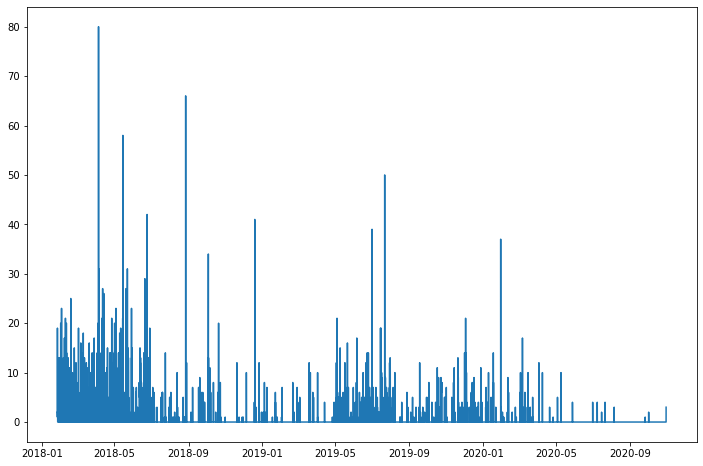

In [93]:
# Visualize Splits (Sanity Check)
x = day.index
y = day.ip

plt.figure(figsize=(12, 8))
plt.plot(x,y)
plt.show()

#### Anommaly Detection

In [94]:
# Bolinger Bands

# set the window span
span = 24

# compute midband
midband = day.ewm(span=span).mean()

In [95]:
# compute exponential stdev
stdev = day.ewm(span=span).std()

In [96]:
# compute upper and lower bands
ub = midband + stdev*3
lb = midband - stdev*3
# Calculate%B
day = pd.concat([day, midband, ub, lb], axis=1)
day.columns = ['ip_hits', 'midband', 'ub', 'lb']
# Creating a percent b column
day['pct_b'] = (day['ip_hits'] - day['lb'])/(day['ub'] - day['lb'])
# Sorting by values > 1
day = day[day['pct_b']>1]

In [97]:
#Explore ip hits greater then 50 in one hour
day[day.ip_hits > 50]

,ip_hits,midband,ub,lb,pct_b
datetime,,,,,
2018-04-04 19:00:00,80,7.103333,73.481860,-59.275193,1.049098
2018-05-15 02:00:00,58,5.892242,54.841440,-43.056956,1.032264
2018-08-27 01:00:00,66,5.313215,60.157343,-49.530912,1.053266


In [98]:
#Find the IP address and user_id involved (19:00)
ninteen = unknown.loc['2018-04-04']
ninteen = ninteen.tail(80)

In [99]:
#User_name
ninteen.user_id.unique()

array([48])

In [100]:
#Ip Address
ninteen.ip.unique()

array(['66.69.62.219'], dtype=object)

***

In [101]:
#Find the IP address and user_id involved (02:00)
two = unknown.loc['2018-05-15']
two = two[two.hour == 2]

In [102]:
# User_name
two.user_id.unique()

array([48])

In [103]:
#Ip Address
two.ip.unique()

array(['66.69.62.219'], dtype=object)

***

In [104]:
#Find the ip address and user id involved (01:00)
one = unknown.loc['2018-08-27']
one = one[one.hour == 1]

In [105]:
one.user_id.unique()

array([247])

In [106]:
one.ip.unique()

array(['72.191.33.138'], dtype=object)

***
**Takeaway:**   
`User 48, ip = '66.69.62.219' are scraping the WebDev website`  


`User 247, ip = '72.191.33.138'are scarping the WebDev website`   
***

***

#### Any strange activity Daily?

In [107]:
# Resample Daily
day = unknown[['ip']]
day = day.resample("D").count()

# set the window span
span = 30

# compute midband
midband = day.ewm(span=span).mean()

# compute exponential stdev
stdev = day.ewm(span=span).std()

# compute upper and lower bands
ub = midband + stdev*3
lb = midband - stdev*3
# Calculate%B
day = pd.concat([day, midband, ub, lb], axis=1)
day.columns = ['ip_hits', 'midband', 'ub', 'lb']
# Creating a percent b column
day['pct_b'] = (day['ip_hits'] - day['lb'])/(day['ub'] - day['lb'])
# Sorting by values > 1
day = day[day['pct_b']>1]
day

,ip_hits,midband,ub,lb,pct_b
datetime,,,,,
2018-08-27,66,6.440546,59.031408,-46.150316,1.066253
2018-10-03,56,6.584308,51.234674,-38.066059,1.053363
2018-10-20,59,7.729810,57.478580,-42.018959,1.015291
2018-12-19,62,5.224564,52.287152,-41.838024,1.103191
2019-02-20,17,1.588787,16.557436,-13.379863,1.014783
2019-03-19,24,2.222690,21.344677,-16.899296,1.069431
2019-05-03,29,2.952202,25.569845,-19.665442,1.075829
2019-05-04,47,5.793995,45.401895,-33.813904,1.020174
2019-07-01,66,10.461782,60.430492,-39.506928,1.055730


In [108]:
#Explore ip hits greater then 50 in one hour
day[day.ip_hits > 50]

,ip_hits,midband,ub,lb,pct_b
datetime,,,,,
2018-08-27,66,6.440546,59.031408,-46.150316,1.066253
2018-10-03,56,6.584308,51.234674,-38.066059,1.053363
2018-10-20,59,7.729810,57.478580,-42.018959,1.015291
2018-12-19,62,5.224564,52.287152,-41.838024,1.103191
2019-07-01,66,10.461782,60.430492,-39.506928,1.055730
2019-07-22,95,14.572164,89.828687,-60.684359,1.034358


In [109]:
#2018-08-27
first = unknown.loc['2018-08-27']
print(first.groupby('user_id')['ip'].count())
print(first.ip.unique())

user_id
247    66
Name: ip, dtype: int64
['72.191.33.138']


In [110]:
#2018-10-03
second = unknown.loc['2018-10-03']
print(second.groupby('user_id')['ip'].count())
print(second.ip.unique())

user_id
48     34
111    22
Name: ip, dtype: int64
['172.58.111.220' '172.56.7.90' '216.177.189.26' '172.58.99.200']


In [111]:
#2018-10-20
third = unknown.loc['2018-10-20']
print(third.groupby('user_id')['ip'].count())
print(third.ip.unique())

user_id
58    59
Name: ip, dtype: int64
['70.120.28.81']


In [112]:
2018-12-19
fourth = unknown.loc['2018-12-19']
print(fourth.groupby('user_id')['ip'].count())
print(fourth.ip.unique())

user_id
317    62
Name: ip, dtype: int64
['72.190.214.41' '99.203.26.13']


In [113]:
#2019-07-01
fifth = unknown.loc['2019-07-01']
print(fifth.groupby('user_id')['ip'].count())
print(fifth.ip.unique())

user_id
88     65
406     1
Name: ip, dtype: int64
['72.48.241.23' '173.173.127.101']


In [114]:
#2019-07-22
sixth = unknown.loc['2019-07-22']
print(sixth.groupby('user_id')['ip'].count())
print(sixth.ip.unique())

user_id
88     89
406     1
429     5
Name: ip, dtype: int64
['72.48.241.23' '68.201.219.223' '173.173.127.101']


***
**Cumulative Anomaly Takeaway:**   
    
Hourly:
- User 48, ip = '66.69.62.219' scraping the WebDev website  
- User 247, ip = '72.191.33.138' scraping the WebDev website  

Daily:
- User 277, ip = '72.191.33.138' scraping the WebDev website  
- User 48, ip = '216.177.189.26' scaping the WebDev website
- User 58, ip = '70.120.28.81' scaping the WebDev website
- User 317, ip = '72.190.214.41' '99.203.26.13' scaping the WebDev website
- User 88, ip = '173.173.127.101' scaping the WebDev and Data Science Website

***

***

#### Any strange activity Weekly?

`None Detected wth a pct_b > 1`

#### Any strange activity Monthly?

`None Detected wth a pct_b > 1`

#### Any strange activity Yearly?

`None Detected wth a pct_b > 1`

#### What about user_111?

In [119]:
user_111 = unknown[unknown.user_id == 111]
user_111

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,int_ip,cohort_id_int
datetime,,,,,,,,,,,
2018-02-28 18:12:27,content/javascript/loops.html,111,0.0,70.117.6.133,2018,2,28,18,Wednesday,1182074501,Unknown
2018-02-28 18:12:32,/,111,0.0,70.117.6.133,2018,2,28,18,Wednesday,1182074501,Unknown
2018-02-28 18:12:37,javascript-i,111,0.0,70.117.6.133,2018,2,28,18,Wednesday,1182074501,Unknown
2018-02-28 19:30:32,javascript-i/loops,111,0.0,70.117.6.133,2018,2,28,19,Wednesday,1182074501,Unknown
2018-02-28 21:00:18,javascript-i/loops,111,0.0,70.117.6.133,2018,2,28,21,Wednesday,1182074501,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-04 10:38:30,spring/fundamentals/controllers,111,0.0,70.123.203.131,2019,1,4,10,Friday,1182518147,Unknown
2019-01-04 10:39:00,spring/fundamentals/security,111,0.0,70.123.203.131,2019,1,4,10,Friday,1182518147,Unknown
2019-01-04 10:39:22,spring/fundamentals/controllers,111,0.0,70.123.203.131,2019,1,4,10,Friday,1182518147,Unknown


In [120]:
user_111.ip.unique()

array(['70.117.6.133', '172.58.100.115', '172.58.102.178',
       '172.58.99.163', '172.58.67.73', '172.56.6.214', '172.58.100.162',
       '172.56.6.173', '172.58.103.50', '172.58.67.211', '172.58.100.28',
       '172.58.100.129', '208.54.86.138', '192.171.117.210',
       '67.11.134.242', '172.58.67.135', '172.58.67.140', '172.58.67.173',
       '172.58.102.236', '70.117.13.185', '71.42.116.142',
       '64.183.206.122', '172.58.111.220', '172.56.7.90', '172.58.99.200',
       '70.123.203.131', '172.58.67.213', '208.54.86.135', '50.84.78.82'],
      dtype=object)

In [ ]:
# #Things to Watch
# user_id  num_ip 	count_page_view
# 58 	     11 	 462
# 79 	     12 	 270
# 86 	     10 	 177
# 88 	     16 	 334
# 111 	 29 	 753
# 429 	 16 	 390

<div class="alert alert-block alert-info"><b></b></div>

## Question #5: At some point in the last year, ability for students and alumni to cross-access curriculum (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before? 

<div class="alert alert-block alert-info"><b></b></div>

In [124]:
# Test by running ds student through webdev course count
web = wrangle.webdev_df(df)
web = explore.ds_page_hit_counter(web)
web

,fundimentals,stats,sql,python,regression,classification,clustering,time_series,anomoly_detection,natural_language,distributed_machine_learning,storytelling,advanced_topics
0,30698,21,65733,71,20,13,71,59,15,9,6,31,12


In [123]:
# Test by running webdev student through ds course count
ds = explore.web_page_hit_counter(ds)
ds.head()

,html,css,git,javascript,tdd,jQuery,java_i,java_ii,mysql,java_iii,spring
0,1206,996,1664,957,11,389,869,539,9445,194,278


***
#### When the complete data frames (2018-2020) were run through the opposit filters they still found matches.  This means that individuals in each cohort were still able to access the curriculum.  By filtering timeseries you should be able to reach a date when these counters reach zero
***

#### Can Webdev Still Access?

In [127]:
# Lets start with August - Nope
web = wrangle.webdev_df(df)
web = web.loc['2019-08-01': '2020-11-02']
web = explore.ds_page_hit_counter(web)
web

,fundimentals,stats,sql,python,regression,classification,clustering,time_series,anomoly_detection,natural_language,distributed_machine_learning,storytelling,advanced_topics
0,16186,15,34350,67,19,13,67,58,15,9,6,26,12


In [134]:
# One Day before df ends? - Nope
web = wrangle.webdev_df(df)
web = web.loc['2020-11-01': '2020-11-02']
web = explore.ds_page_hit_counter(web)
web

,fundimentals,stats,sql,python,regression,classification,clustering,time_series,anomoly_detection,natural_language,distributed_machine_learning,storytelling,advanced_topics
0,50,8,657,14,8,11,14,11,5,7,6,12,10


***
**It appears that the WebDev students can still access the ds curriculum**
***

#### Can DS Still Access?

In [135]:
# Lets start with August - Nope
ds = wrangle.ds_df(df)
ds = ds.loc['2019-08-01': '2020-11-02']
ds = explore.web_page_hit_counter(ds)
ds

,html,css,git,javascript,tdd,jQuery,java_i,java_ii,mysql,java_iii,spring
0,674,478,1357,446,11,160,435,251,8752,49,75


In [155]:
ds = wrangle.ds_df(df)
ds = ds.loc['2020-10-01': '2020-11-02']
ds = explore.web_page_hit_counter(ds)
ds

,html,css,git,javascript,tdd,jQuery,java_i,java_ii,mysql,java_iii,spring
0,19,17,16,4,9,1,153,126,317,4,0


In [150]:
ds = wrangle.ds_df(df)
ds = ds.loc['2020-10-30': '2020-11-02']
ds = explore.web_page_hit_counter(ds)
ds

,html,css,git,javascript,tdd,jQuery,java_i,java_ii,mysql,java_iii,spring
0,0,0,4,0,0,0,1,1,12,1,0


In [153]:
ds = wrangle.ds_df(df)
ds = ds.loc['2020-10-31': '2020-11-02']
ds = explore.web_page_hit_counter(ds)
ds

,html,css,git,javascript,tdd,jQuery,java_i,java_ii,mysql,java_iii,spring
0,0,0,3,0,0,0,1,1,9,1,0


***

**Access was removed for DS students on '2020-10**

***

In [136]:
# One Day before df ends - Yes
ds = wrangle.ds_df(df)
ds = ds.loc['2020-11-01': '2020-11-02']
ds = explore.web_page_hit_counter(ds)
ds

,html,css,git,javascript,tdd,jQuery,java_i,java_ii,mysql,java_iii,spring
0,0,0,3,0,0,0,1,1,9,1,0


***
**It appears that the ds science can not (or do not care to) access the WebDev Curriculum**
***

<div class="alert alert-block alert-info"><b></b></div>

## Question#6: What topics are grads continuing to reference after graduation and into their jobs (for each program)? 

<div class="alert alert-block alert-info"><b></b></div>

#### Webdev

In [157]:
#Lets make a dataframe
web = wrangle.webdev_df(df)
Arches = web[web.cohort_id_int == 'Arches']
Arches = Arches['2014-04-22':'2020-11-02']
Arches = explore.web_page_hit_counter(Arches)

Badlands = web[web.cohort_id_int == 'Badlands']
Badlands = Badlands['2014-08-22':'2020-11-02']
Badlands = explore.web_page_hit_counter(Badlands)

Carlsbad = web[web.cohort_id_int == 'Carlsbad']
Carlsbad = Carlsbad['2014-11-05':'2020-11-02'] 
Carlsbad = explore.web_page_hit_counter(Carlsbad)

Denali = web[web.cohort_id_int == 'Denali']
Denali = Denali['2015-01-18':'2020-11-02']
Denali = explore.web_page_hit_counter(Denali)

Everglades = web[web.cohort_id_int == 'Everglades']
Everglades = Everglades['2015-02-24':'2020-11-02']
Everglades = explore.web_page_hit_counter(Everglades)

Franklin = web[web.cohort_id_int == 'Franklin']
Franklin = Franklin['2015-05-26':'2020-11-02']
Franklin = explore.web_page_hit_counter(Franklin)

Glacier = web[web.cohort_id_int == 'Glacier']
Glacier = Glacier['2015-10-06':'2020-11-02']
Glacier = explore.web_page_hit_counter(Glacier)

Hampton = web[web.cohort_id_int == 'Hampton']
Hampton = Hampton['2016-02-06':'2020-11-02']
Hampton = explore.web_page_hit_counter(Hampton)

Apollo = web[web.cohort_id_int == 'Apollo']
Apollo = Apollo['2015-07-29':'2020-11-02']
Apollo = explore.web_page_hit_counter(Apollo)

Balboa = web[web.cohort_id_int == 'Balboa']
Balboa = Balboa['2016-03-11':'2020-11-02']
Balboa = explore.web_page_hit_counter(Balboa)

Ike = web[web.cohort_id_int == 'Ike']
Ike = Ike['2016-05-12':'2020-11-02']
Ike= explore.web_page_hit_counter(Ike)

Joshua = web[web.cohort_id_int == 'Joshua']
Joshua = Joshua['2016-06-30':'2020-11-02']
Joshua = explore.web_page_hit_counter(Joshua)

Kings = web[web.cohort_id_int == 'Kings']
Kings = Kings['2016-09-15':'2020-11-02']
Kings = explore.web_page_hit_counter(Kings)

Lassen = web[web.cohort_id_int == 'Lassen']
Lassen = Lassen['2016-11-10':'2020-11-02']
Lassen = explore.web_page_hit_counter(Lassen)

Mammoth = web[web.cohort_id_int == 'Mammoth']
Mammoth = Mammoth['2017-02-02':'2020-11-02']
Mammoth = explore.web_page_hit_counter(Mammoth)

Niagara = web[web.cohort_id_int == 'Niagara']
Niagara = Niagara['2017-03-09':'2020-11-02']
Niagara = explore.web_page_hit_counter(Niagara)

Olympic = web[web.cohort_id_int == 'Olympic']
Olympic = Olympic['2017-05-25':'2020-11-02']
Olympic = explore.web_page_hit_counter(Olympic)

Pinnacles = web[web.cohort_id_int == 'Pinnacles']
Pinnacles = Pinnacles['2017-07-20':'2020-11-02']
Pinnacles = explore.web_page_hit_counter(Pinnacles)

Quincy = web[web.cohort_id_int == 'Quincy']
Quincy = Quincy['2017-09-22':'2020-11-02']
Quincy = explore.web_page_hit_counter(Quincy)

Redwood = web[web.cohort_id_int == 'Redwood']
Redwood = Redwood['2017-12-06':'2020-11-02']
Redwood = explore.web_page_hit_counter(Redwood)

Sequoia = web[web.cohort_id_int == 'Sequoia']
Sequoia = Sequoia['2018-02-15':'2020-11-02']
Sequoia = explore.web_page_hit_counter(Sequoia)

Teddy = web[web.cohort_id_int == 'Teddy']
Teddy = Teddy['2018-05-17':'2020-11-02']
Teddy = explore.web_page_hit_counter(Teddy)

Ulysses = web[web.cohort_id_int == 'Ulysses']
Ulysses = Ulysses['2018-07-19':'2020-11-02']
Ulysses = explore.web_page_hit_counter(Ulysses)

Voyageurs = web[web.cohort_id_int == 'Voyageurs']
Voyageurs = Voyageurs['2018-10-11':'2020-11-02']
Voyageurs = explore.web_page_hit_counter(Voyageurs)

Wrangell = web[web.cohort_id_int == 'Wrangell']
Wrangell = Wrangell['2018-11-29':'2020-11-02']
Wrangell = explore.web_page_hit_counter(Wrangell)

Xanadu = web[web.cohort_id_int == 'Xanadu']
Xanadu = Xanadu['2019-02-08':'2020-11-02'] 
Xanadu = explore.web_page_hit_counter(Xanadu)

Yosemite = web[web.cohort_id_int == 'Yosemite']
Yosemite = Yosemite['2019-04-03':'2020-11-02'] 
Yosemite = explore.web_page_hit_counter(Yosemite)

Zion = web[web.cohort_id_int == 'Zion']
Zion = Zion['2019-06-04':'2020-11-02']
Zion = explore.web_page_hit_counter(Zion)

Andromeda = web[web.cohort_id_int == 'Andromeda']
Andromeda = Andromeda['2019-07-30':'2020-11-02']
Andromeda = explore.web_page_hit_counter(Andromeda)

Betelgeuse = web[web.cohort_id_int == 'Betelgeuse']
Betelgeuse = Betelgeuse['2019-10-08':'2020-11-02'] 
Betelgeuse = explore.web_page_hit_counter(Betelgeuse)

Ceres = web[web.cohort_id_int == 'Ceres']
Ceres = Ceres['2019-12-11':'2020-11-02']
Ceres = explore.web_page_hit_counter(Ceres)

Deimos = web[web.cohort_id_int == 'Deimos']
Deimos = Deimos['2020-02-27':'2020-11-02']
Deimos = explore.web_page_hit_counter(Deimos)

Europa = web[web.cohort_id_int == 'Europa']
Europa = Europa['2020-04-17':'2020-11-02']
Europa = explore.web_page_hit_counter(Europa)

Fortuna = web[web.cohort_id_int == 'Fortuna']
Fortuna = Fortuna['2020-06-23':'2020-11-02']
Fortuna = explore.web_page_hit_counter(Fortuna)

Apex = web[web.cohort_id_int == 'Apex']
Apex = Apex['2020-07-29':'2020-11-02']
Apex = explore.web_page_hit_counter(Apex)

Ganymede = web[web.cohort_id_int == 'Ganymede']
Ganymede = Ganymede['2020-8-20':'2020-11-02']
Ganymede = explore.web_page_hit_counter(Ganymede)

Hyperion = web[web.cohort_id_int == 'Hyperion']
Hyperion = Hyperion['2020-11-10':'2020-11-02']
Hyperion = explore.web_page_hit_counter(Hyperion)

Io = web[web.cohort_id_int == 'Io']
Io = Io['2021-01-21':'2020-11-02']
Io = explore.web_page_hit_counter(Io)

Bash = web[web.cohort_id_int == 'Bash']
Bash = Bash['2021-01-21':'2020-11-02']
Bash = explore.web_page_hit_counter(Bash)

Jupiter = web[web.cohort_id_int == 'Jupiter']
Jupiter = Jupiter['2021-03-30':'2020-11-02']
Jupiter = explore.web_page_hit_counter(Jupiter)

In [158]:
post_cohort_web = pd.concat([Arches, Badlands, Carlsbad, Denali, Everglades, Franklin, Glacier, Hampton, Apollo, Balboa, Ike, Joshua, Kings,
Lassen, Mammoth, Niagara, Olympic, Pinnacles, Quincy, Redwood, Sequoia, Teddy, Ulysses, Voyageurs, Wrangell,
Xanadu, Yosemite, Zion, Andromeda, Betelgeuse, Ceres, Deimos, Europa, Fortuna, Apex, Ganymede, Hyperion, Io,
Bash, Jupiter], keys = ['Arches', 'Badlands', 'Carlsbad', 'Denali', 'Everglades', 'Franklin', 'Glacier', 'Hampton', 'Apollo', 'Balboa', 'Ike', 'Joshua', 'Kings',
'Lassen', 'Mammoth', 'Niagara', 'Olympic', 'Pinnacles', 'Quincy', 'Redwood', 'Sequoia', 'Teddy', 'Ulysses', 'Voyageurs', 'Wrangell',
'Xanadu', 'Yosemite', 'Zion', 'Andromeda', 'Betelgeuse', 'Ceres', 'Deimos', 'Europa', 'Fortuna',' Apex', 'Ganymede', 'Hyperion', 'Io',
'Bash', 'Jupiter'] )
post_cohort_web

,,html,css,git,javascript,tdd,jQuery,java_i,java_ii,mysql,java_iii,spring
Arches,0,1362,1169,87,2082,0,650,1618,1196,815,696,968
Badlands,0,27,6,5,6,0,0,1,0,4,0,0
Carlsbad,0,0,0,0,0,0,0,0,0,0,0,0
Denali,0,0,0,1,0,0,0,0,0,0,0,0
Everglades,0,0,0,0,0,0,0,0,0,0,0,0
Franklin,0,2,1,0,21,0,3,20,16,5,11,5
Glacier,0,171,120,49,174,0,6,14,2,25,2,5
Hampton,0,156,101,71,214,0,45,430,322,145,212,182
Apollo,0,4,4,1,0,0,0,0,0,0,0,0
Balboa,0,0,0,0,0,0,0,0,0,0,0,0


***
`Takeaway:`

    1. Still Very Popular after Graduation: HTML, CSS, Javascript, Java-i, Java-ii

***

#### Data Science

In [160]:
#### Data Science:
ds = wrangle.ds_df(df)

ada = ds[ds.cohort_id_int == 'Ada']
ada = ada['2019-06-16':'2020-11-02']
ada = explore.ds_page_hit_counter(ada)

bayes = ds[ds.cohort_id_int == 'Bayes']
bayes = bayes['2020-01-30':'2020-11-02']
bayes = explore.ds_page_hit_counter(bayes)

curie = ds[ds.cohort_id_int == 'Curie']
curie = curie['2020-07-07':'2020-11-02']
curie = explore.ds_page_hit_counter(curie)

darden = ds[ds.cohort_id_int == 'Darden']
darden = darden['2021-01-12':'2020-11-02']
darden = explore.ds_page_hit_counter(darden)

post_cohort_ds = pd.concat([ada, bayes, curie, darden], keys = ['ada', 'bayes','curie','darden'])
post_cohort_ds

,,fundimentals,stats,sql,python,regression,classification,clustering,time_series,anomoly_detection,natural_language,distributed_machine_learning,storytelling,advanced_topics
ada,0,402,110,503,290,209,140,290,191,140,139,110,20,127
bayes,0,385,203,379,213,436,291,213,251,108,122,107,34,119
curie,0,289,114,472,183,89,280,183,223,116,70,41,22,56
darden,0,0,0,0,0,0,0,0,0,0,0,0,0,0


***
`Takeaway:`

    1. Still Very Popular after Graduation: Fundimentals, SQL, Regression, Classification, Clustering, Time Series
    2. DS Curriculum is more focused on skills, those skills reflect what graduates see afterward
***

<div class="alert alert-block alert-info"><b></b></div>

## Question #7: Which lessons are least accessed? 

***

***Web Development***
1. Git
2. TDD


***DataScience***
1. Stats
2. Storytelling

***

<div class="alert alert-block alert-info"><b></b></div>

## Executive Summary Codeup Curiculum
***
#### Data Source:
- Log data on 58 Cohorts - Full Stack Development
- Log data on 04 Cohorts - Data Science
***
### Access Demographics:
***
#### Full Stack Web Development:
- 11 Modules identifid by keyword search
- Most Popular Modules:
- Most Frequently Revisited by Alumni: 
- Least Popular:
***
#### Data Science:
- 13 Modules identfied by keyword search
- Most Popular Modules:
- Most Frequently Revisited by Alumni:
- Least Popular:
***
### Curiculum Access and Security
***
#### Active vs. Inactive Students:
- Definition
- Results
- Suggestions/Followup
***
#### Supsicious/Anamolous Observations:
- Define suspisious activity
- user_id, ip, description of behavior
- Suggestions/Followup
***
#### Curriculum Double Dip:
- Evidence
- Results
- Suggestions/Followup

<div class="alert alert-block alert-info"><b></b></div>